# Project 2: Binary Classification on ‘Customer_Churn’using Keras

#### Problem Statement:

    You are the Data Scientist at a telecom company “Leo” whose customers are churning out to its competitors. You have to analyse the data of your company and find insights and stop your customers from churning out to other telecom companies.

In [224]:
# Import the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [225]:
# Load the data

churn = pd.read_csv("Customer_churn.csv")

In [226]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [227]:
churn.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [228]:
churn.shape

(7043, 21)

In [229]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [230]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [231]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<hr>

#### Tasks to be done:

    A) Data Manipulation:
        a. Find the total number of male customers
        b. Find the total number of customers whose Internet Service is ‘DSL’
        c. Extract all the Female senior citizens whose Payment Method is Mailed check & store the result in ‘new_customer’
        d. Extract all those customers whose tenure is less than 10 months or their Total charges is less than 500$ & store the result in ‘new_customer’

In [232]:
# a. Find the total number of male customers

total_customers = sum(churn['gender'] == 'Male')
total_customers

3555

In [233]:
# b. Find the total number of customers whose Internet Service is ‘DSL’

Internet_DSL = sum(churn['InternetService'] == 'DSL')
Internet_DSL

2421

In [234]:
# c. Extract all the Female senior citizens whose Payment Method is Mailed check & store the result in ‘new_customer’

new_customer = churn[(churn['gender'] == 'Female') & (churn['SeniorCitizen'] == 1) & (churn['PaymentMethod'] == 'Mailed check')]
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.7,Yes
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.4,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.6,No


In [235]:
#  d. Extract all those customers whose tenure is less than 10 months or their Total charges is less than 500$ & store the result in ‘new_customer’

churn['TotalCharges'] = churn['TotalCharges'].replace(" ", np.nan)
churn['TotalCharges'] = churn['TotalCharges'].astype('float')

new_customer = churn[(churn['tenure'] < 10) | (churn['TotalCharges'] < 500)]
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


In [236]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<hr>

    B) Data Visualization:
        a. Build a pie-chart to show the distribution of customers would be churning out
        b. Build a bar-plot to show the distribution of ‘Internet Service’

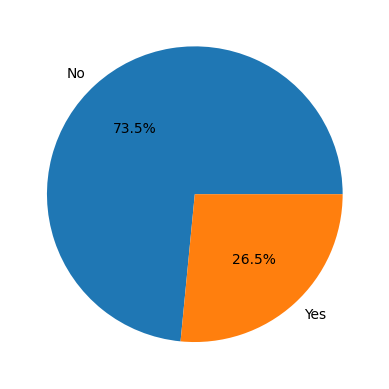

In [237]:
# a. Build a pie-chart to show the distribution of customers would be churning out

name = churn['Churn'].value_counts().keys().tolist()
size = churn['Churn'].value_counts().tolist()

plt.pie(size, labels = name, autopct = "%0.1f%%")
plt.show()


In [238]:
# b. Build a bar-plot to show the distribution of ‘Internet Service’

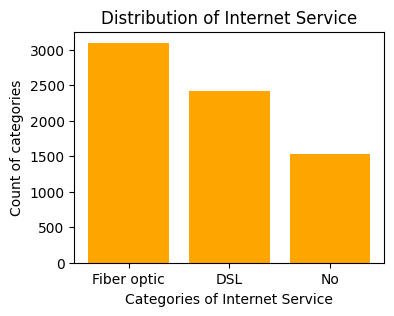

In [239]:
plt.figure(figsize = (4, 3))
plt.bar(churn['InternetService'].value_counts().keys().tolist(), churn['InternetService'].value_counts().tolist(), color = 'orange')
plt.xlabel("Categories of Internet Service")
plt.ylabel("Count of categories")
plt.title('Distribution of Internet Service')
plt.show()

<hr>

    C) Model Building:
        a. Build a sequential model using Keras, to find out if the customerwouldchurn or not, using ‘tenure’ as the feature and ‘Churn’ as the dependent/target column:
            i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.
            ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
            iii. Use ‘Adam’ as the optimization algorithm
            iv. Fit the model on the train set, with number of epochs to be 150
            v. Predict the values on the test set and build a confusion matrix
            vi. Plot the ‘Accuracy vs Epochs’ graph

In [206]:
X = churn[['tenure']].values 
y = churn['Churn'].map({'No': 0, 'Yes': 1}).values

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [208]:
# Scale the tenure 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [176]:
# Build the sequential model

model = Sequential()
model.add(Dense(12, activation='relu', input_shape=(1,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [177]:
# Compile the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [178]:
# Fit the model on the train set for 150 epochs

history = model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test))

Epoch 1/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7126 - loss: 0.6444 - val_accuracy: 0.7283 - val_loss: 0.5656
Epoch 2/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7427 - loss: 0.5417 - val_accuracy: 0.7283 - val_loss: 0.5153
Epoch 3/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7355 - loss: 0.5207 - val_accuracy: 0.7283 - val_loss: 0.5108
Epoch 4/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7524 - loss: 0.4965 - val_accuracy: 0.7511 - val_loss: 0.5096
Epoch 5/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7525 - loss: 0.5075 - val_accuracy: 0.7283 - val_loss: 0.5109
Epoch 6/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7370 - loss: 0.5138 - val_accuracy: 0.7549 - val_loss: 0.5090
Epoch 7/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7502 - loss: 0.5151 - val_accuracy: 0.7539 - val_loss: 0.5095
Epoch 8/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7458 - loss: 0.5103 - val_accu

In [179]:
np.mean(model.history.history['val_accuracy'])

0.7491023818651835

In [180]:
# Predicting on the test set

y_pred = (model.predict(X_test) > 0.5).astype("int32")

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


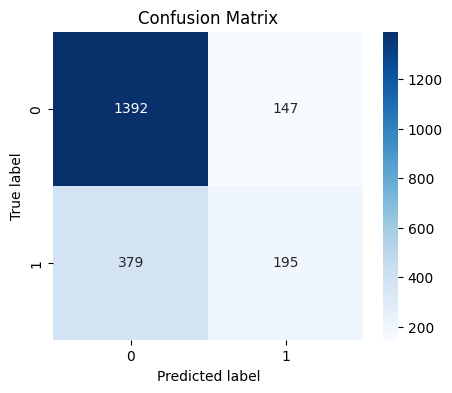

In [181]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

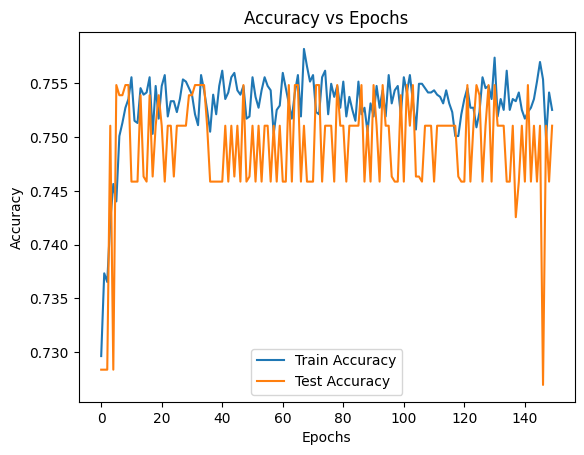

In [182]:
# Plot accuracy vs epochs

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<hr>

    C) Model Building:
        b. Build the 2nd model using same target and feature variables:
            i. Add a drop-out layer after the input layer with drop-out value of 0.3
            ii. Add a drop-out layer after the hidden layer with drop-out value of 0.2
            iii. Predict the values on the test set and build a confusion matrix
            iv. Plot the ‘Accuracy vs Epochs’ graph

In [209]:
# Build the sequential model

model = Sequential()
model.add(Dense(12, activation='relu', input_dim=1))  
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [210]:
# Compile the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [211]:
# Train the model

history = model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test), verbose=1)

Epoch 1/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6792 - loss: 0.6340 - val_accuracy: 0.7283 - val_loss: 0.5285
Epoch 2/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7454 - loss: 0.5305 - val_accuracy: 0.7283 - val_loss: 0.5164
Epoch 3/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7344 - loss: 0.5269 - val_accuracy: 0.7283 - val_loss: 0.5138
Epoch 4/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7482 - loss: 0.5284 - val_accuracy: 0.7283 - val_loss: 0.5122
Epoch 5/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7451 - loss: 0.5265 - val_accuracy: 0.7283 - val_loss: 0.5120
Epoch 6/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7437 - loss: 0.5121 - val_accuracy: 0.7269 - val_loss: 0.5111
Epoch 7/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7455 - loss: 0.5123 - val_accuracy: 0.7269 - val_loss: 0.5121
Epoch 8/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7451 - loss: 0.5175 - val_accu

In [213]:
np.mean(model.history.history['val_accuracy'])

0.7513771891593933

In [214]:
# Predicting on the test set

y_pred = (model.predict(X_test) > 0.5).astype("int32")

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


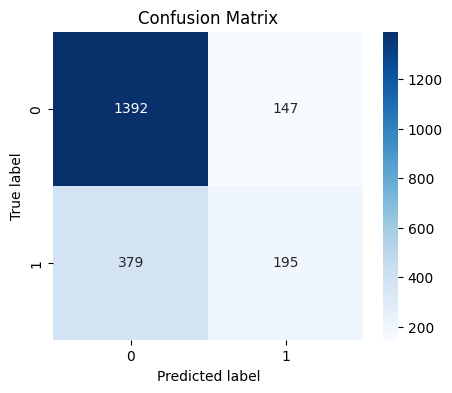

In [215]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

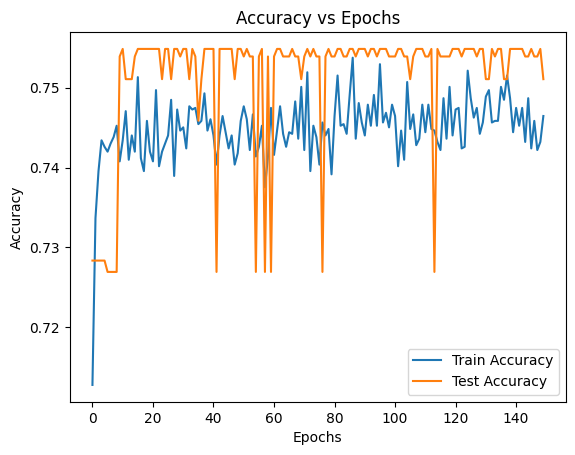

In [216]:
# Plot accuracy vs epochs

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<hr>

    C) Model Building:

        c. Build the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and ‘Churn’ as the dependent/target column:
            i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.
            ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
            iii. Use ‘Adam’ as the optimization algorithm
            iv. Fit the model on the train set, with number of epochs to be 150
            v. Predict the values on the test set and build a confusion matrix
            vi. Plot the ‘Accuracy vs Epochs’ graph

In [266]:
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')
churn = churn.dropna(subset=['TotalCharges', 'Churn'])

In [269]:
X = churn[['MonthlyCharges', 'tenure', 'TotalCharges']]
y = churn['Churn'].map({'No': 0, 'Yes': 1})

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [271]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=3))  
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [272]:
# Compile the model

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [273]:
# Train the model

history = model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test), verbose=1)


Epoch 1/150


154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5873 - loss: 21.7233 - val_accuracy: 0.7090 - val_loss: 0.9207
Epoch 2/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6938 - loss: 0.8073 - val_accuracy: 0.7355 - val_loss: 0.5868
Epoch 3/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7317 - loss: 0.8114 - val_accuracy: 0.7564 - val_loss: 0.7355
Epoch 4/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7262 - loss: 0.7112 - val_accuracy: 0.7408 - val_loss: 0.7511
Epoch 5/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7389 - loss: 0.7963 - val_accuracy: 0.7289 - val_loss: 0.5689
Epoch 6/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7333 - loss: 0.7570 - val_accuracy: 0.7540 - val_loss: 0.5455
Epoch 7/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7413 - loss: 0.6742 - val_accuracy: 0.5725 - val_loss: 1.1073
Epoch 8/150
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7155 - loss: 1.0886 - val_accuracy: 0.757

In [274]:
np.mean(model.history.history['val_accuracy'])

0.7444107437133789

In [275]:
# Predicting on the test set

y_pred = (model.predict(X_test) > 0.5).astype("int32")

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


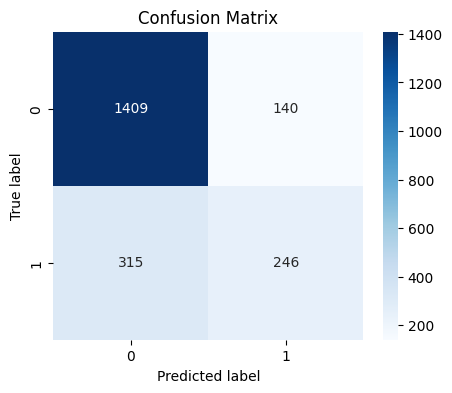

In [276]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

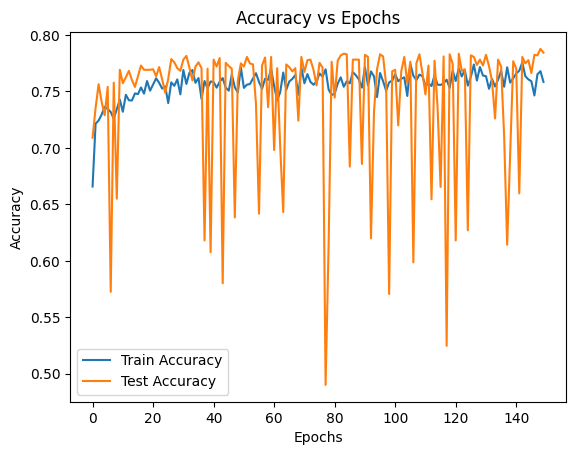

In [277]:
# Plot accuracy vs epochs

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


<hr>


#### Conclusion:

- The first model gave us a mean validation accuracy of 75.11%,
- The second model gave us a mean validation accuracy of 75.13%, 
- The second model gave us a mean validation accuracy of 74.44%


The third model gave the least accuracy probably one or more of the features used during the model building could be of less significance leading to the reduction in accuracy

<hr>